In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train=pd.read_csv('C:/Users/OLANREWAJU/Documents/Courses/Second Semeter/CA2/ML/Dataset/Tobacco-Related_Deaths_in_the_City_of_Austin_2006-2018.csv')
train.head()

,Year,Tobacco Contributed to the Death,Age,Sex,Race/Ethnicity,Age Group (10-year)
0,2006,PROBABLY,64,FEMALE,White_NonHispanic,60-69
1,2006,PROBABLY,80,FEMALE,White_NonHispanic,80-89
2,2006,PROBABLY,84,MALE,White_NonHispanic,80-89
3,2006,PROBABLY,57,MALE,White_NonHispanic,50-59
4,2006,PROBABLY,72,MALE,White_NonHispanic,70-79


In [41]:
#missing value 

train.isnull()

,Year,Tobacco Contributed to the Death,Age,Sex,Race/Ethnicity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
8968,False,False,False,False,False
8969,False,False,False,False,False
8970,False,False,False,False,False
8971,False,False,False,False,False


In [10]:
#sum N/A

train.isnull().sum()

Year                                 0
Tobacco Contributed to the Death     0
Age                                  0
Sex                                  0
Race/Ethnicity                      43
Age Group (10-year)                  0
dtype: int64

In [42]:
#drop N/A
trainn = train.dropna()
trainn.head()

,Year,Tobacco Contributed to the Death,Age,Sex,Race/Ethnicity
0,2006,0,64,0,White_NonHispanic
1,2006,0,80,0,White_NonHispanic
2,2006,0,84,1,White_NonHispanic
3,2006,0,57,1,White_NonHispanic
4,2006,0,72,1,White_NonHispanic


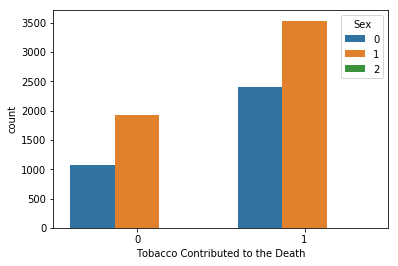

In [45]:
sns.countplot(x='Tobacco Contributed to the Death', hue='Sex',data=trainn)

In [46]:
trainn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 0 to 8972
Data columns (total 5 columns):
Year                                8955 non-null int64
Tobacco Contributed to the Death    8955 non-null int32
Age                                 8955 non-null int64
Sex                                 8955 non-null int32
Race/Ethnicity                      8955 non-null object
dtypes: int32(2), int64(2), object(1)
memory usage: 669.8+ KB


In [47]:
#Data preprocessing (int)

from sklearn.preprocessing import LabelEncoder

converter = LabelEncoder()
trainn['Tobacco Contributed to the Death'] = converter.fit_transform(trainn['Tobacco Contributed to the Death'].astype(str))
trainn['Sex'] = converter.fit_transform(trainn['Sex'].astype(str))

trainn

,Year,Tobacco Contributed to the Death,Age,Sex,Race/Ethnicity
0,2006,0,64,0,White_NonHispanic
1,2006,0,80,0,White_NonHispanic
2,2006,0,84,1,White_NonHispanic
3,2006,0,57,1,White_NonHispanic
4,2006,0,72,1,White_NonHispanic
...,...,...,...,...,...
8968,2018,1,77,1,White_NonHispanic
8969,2018,1,74,1,White_NonHispanic
8970,2018,1,73,0,White_NonHispanic
8971,2018,1,62,0,White_NonHispanic


In [49]:
X = trainn.drop(['Race/Ethnicity'], axis=1)
X.head()

,Year,Tobacco Contributed to the Death,Age,Sex
0,2006,0,64,0
1,2006,0,80,0
2,2006,0,84,1
3,2006,0,57,1
4,2006,0,72,1


In [50]:
y = trainn['Race/Ethnicity']
y

0       White_NonHispanic
1       White_NonHispanic
2       White_NonHispanic
3       White_NonHispanic
4       White_NonHispanic
              ...        
8968    White_NonHispanic
8969    White_NonHispanic
8970    White_NonHispanic
8971    White_NonHispanic
8972    Black_NonHispanic
Name: Race/Ethnicity, Length: 8955, dtype: object

In [57]:
#Classification - Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

C:\Users\OLANREWAJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OLANREWAJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['White_NonHispanic', 'White_NonHispanic', 'White_NonHispanic', ...,
       'White_NonHispanic', 'White_NonHispanic', 'White_NonHispanic'],
      dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
score

0.7437185929648241

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predictions))

                              precision    recall  f1-score   support

             American_Indian       0.00      0.00      0.00        16
           Asian_NonHispanic       0.00      0.00      0.00        55
           Black_NonHispanic       0.00      0.00      0.00       834
                    Hispanic       0.00      0.00      0.00       802
           Other_NonHispanic       0.00      0.00      0.00        11
Pacific_Islander_NonHispanic       0.00      0.00      0.00        14
         Unknown_NonHispanic       0.00      0.00      0.00         3
           White_NonHispanic       0.76      1.00      0.86      5429

                   micro avg       0.76      0.76      0.76      7164
                   macro avg       0.09      0.12      0.11      7164
                weighted avg       0.57      0.76      0.65      7164



C:\Users\OLANREWAJU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\OLANREWAJU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\OLANREWAJU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
#Model evaluation - Logistic VS KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
#KNN Accuracy

print(knn.score(X_train,y_train))

knn_score = knn.predict(X_train)
print(knn_score)

0.7604690117252931
['White_NonHispanic' 'White_NonHispanic' 'White_NonHispanic' ...
 'White_NonHispanic' 'White_NonHispanic' 'White_NonHispanic']
